# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

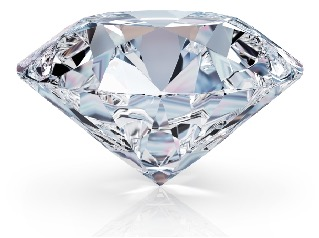

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
DIAMONDS_DATASET = "diamonds_good.csv"

In [64]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [65]:
df.head(10)

carat        cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23      Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
5    NaN  Very Good     J    VVS2   62.8   57.0  336.0  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0  336.0  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0  337.0  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0  337.0  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0  338.0  4.00  4.05  2.39

In [66]:
df.tail() # хвостик таблицы

carat        cut color clarity  depth  table   price   'x'   'y'   'z'
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

In [67]:
df.sample(3)

carat      cut color clarity  depth  table   price   'x'   'y'   'z'
53169   0.71  Premium     E     SI1   61.1   57.0  2629.0  5.73  5.69  3.49
19428   1.34    Ideal     I    VVS2   61.4   56.0  8079.0  7.07  7.09  4.35
30858   0.33  Premium     G     VS2   60.8   58.0   743.0  4.47  4.45  2.71

## Исследование данных

Размер датасета

In [68]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Основные числовые характеристики

In [70]:
df.describe(include = 'float64')

carat         depth         table         price           'x'  \
count  53442.000000  52950.000000  53940.000000  53940.000000  53940.000000   
mean       0.797561     61.749422     57.457184   3932.799722      5.731157   
std        0.473534      1.431558      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                'y'           'z'  
count  53935.000000  53940.000000  
mean       5.734469      3.538734  
std        1.142125      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [71]:
df.describe(include='object')

cut  color clarity
count   53940  53940   53940
unique      6      7       8
top     Ideal      G     SI1
freq    21524  11292   13065

In [72]:
df.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53442.000000  53940  53940   53940  52950.000000  53940.000000   
unique           NaN      6      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21524  11292   13065           NaN           NaN   
mean        0.797561    NaN    NaN     NaN     61.749422     57.457184   
std         0.473534    NaN    NaN     NaN      1.431558      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price           'x'           'y'           'z'  
count   53940.000000  53940.000000  53935.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734469      3.538734  
std      3989.439738      1.121761      1.142125      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

In [73]:
df.duplicated().sum() # кол-во дубликатов

np.int64(135)

In [75]:
df[df.duplicated()]

carat    cut color clarity  depth  table   price   'x'   'y'   'z'
1005    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0  3105.0  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...     ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0  1919.0  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0  2093.0  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0  2130.0  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0  2203.0  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0  2579.0  5.21  5.18  4.09

[135 rows x 10 columns]

In [76]:
# df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.shape

(53805, 10)

In [77]:
df.reset_index(inplace=True, drop=True)  
# мы же дубликаты удалили, поэтому где-то вот такая оборвашка 1,2,3,4,1000,1001,1002,...... 
# Как раз для этого ресетаем индексы
df.head()

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

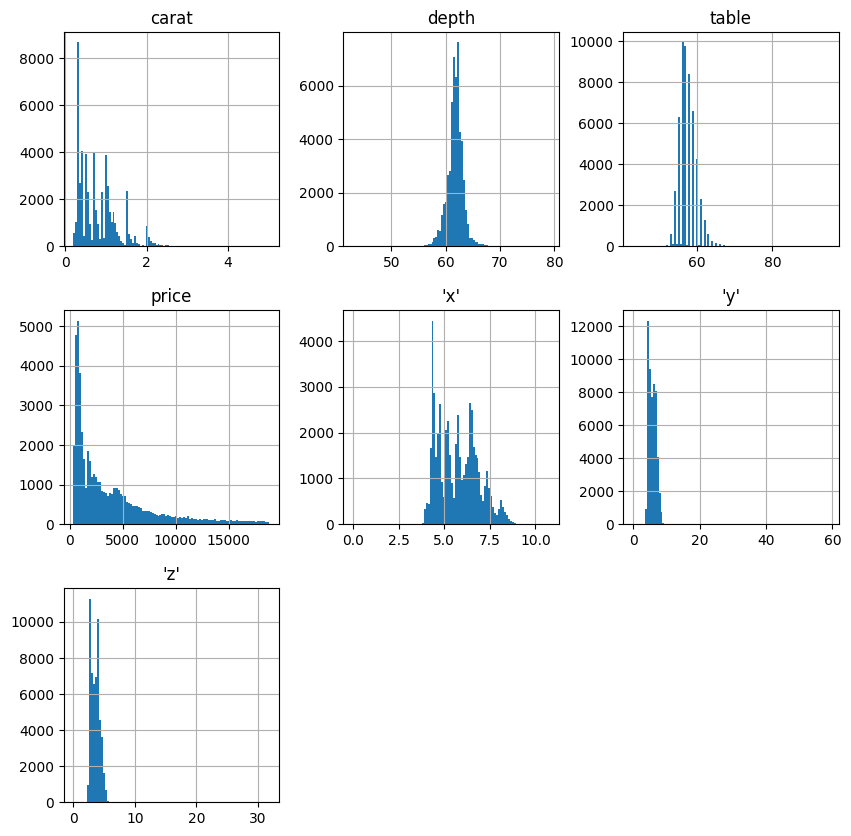

In [ ]:
df[["carat","depth","table","price","'x'","'y'","'z'"]].hist(bins=100, figsize=(10,10));

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53805 entries, 0 to 53804
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53307 non-null  float64
 1   cut      53805 non-null  object 
 2   color    53805 non-null  object 
 3   clarity  53805 non-null  object 
 4   depth    52815 non-null  float64
 5   table    53805 non-null  float64
 6   price    53805 non-null  float64
 7   'x'      53805 non-null  float64
 8   'y'      53800 non-null  float64
 9   'z'      53805 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [79]:
df.isnull().sum()

carat      498
cut          0
color        0
clarity      0
depth      990
table        0
price        0
'x'          0
'y'          5
'z'          0
dtype: int64

Заполняем медианными значениями

In [80]:
median_carat = df['carat'].median()

df.fillna({'carat': median_carat}, inplace=True)

In [81]:
median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

/tmp/ipykernel_10258/2155475674.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(median_depth, inplace=True)


### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [82]:
df["'y'"].fillna(df["'y'"].median(),inplace=True)

/tmp/ipykernel_10258/386427157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["'y'"].fillna(df["'y'"].median(),inplace=True)


## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

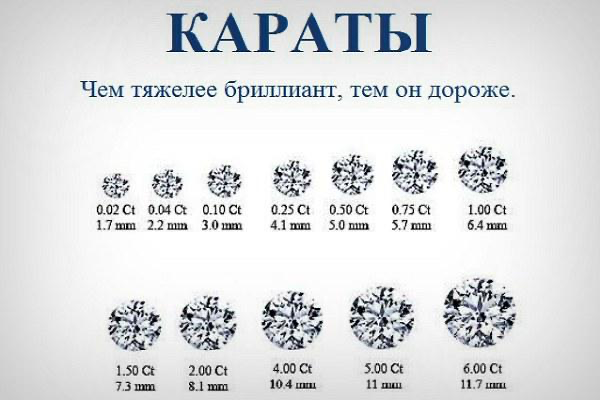

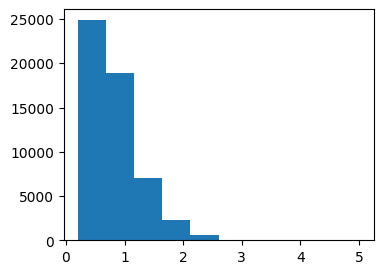

In [83]:
plt.figure(figsize=(4,3))

plt.hist(df.carat);

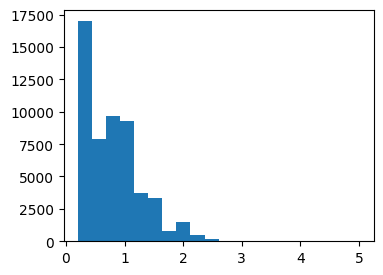

In [84]:
plt.figure(figsize=(4,3))

plt.hist(df.carat, bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [85]:
df.carat.min(), df.carat.max()

(np.float64(0.2), np.float64(5.01))

Сколько мелких бриллиантов в датасете?

In [86]:
len(df[df.carat < 0.3])

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [87]:
100 * len(df[df.carat >= 1]) / len(df)

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

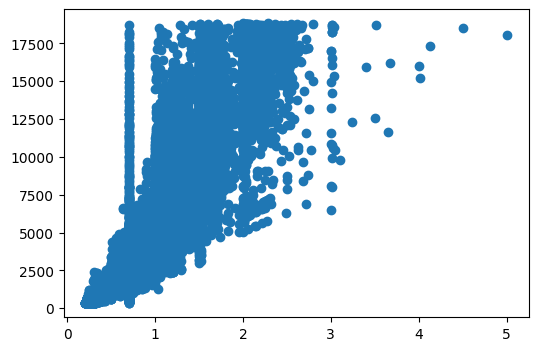

In [88]:
plt.figure(figsize=(6,4))

plt.scatter(df.carat, df.price);

In [ ]:
np.corrcoef(df.carat, df.price)[0][1]

np.float64(0.9164989435440223)

### Cut (огранка алмаза)

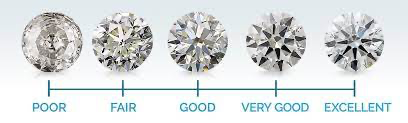

In [89]:
df['cut'].value_counts(normalize=True)

cut
Ideal        0.398941
Premium      0.255088
Very Good    0.224013
Good         0.090772
Fair         0.029700
Goood        0.001487
Name: proportion, dtype: float64

In [106]:
df['cut'] = df['cut'].replace('Goood', 'Good')

Посмотрим как влияет огранка алмаза на его стоимость

/tmp/ipykernel_10258/1625806102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


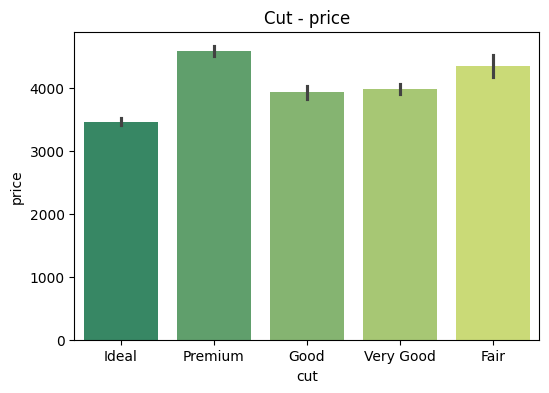

In [107]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [108]:
df[df['cut'] == 'Fair'].carat.max()

np.float64(5.01)

Посчитаем среднюю стоимость алмазов в каждой категории

In [109]:
df.groupby('cut')['price'].mean()

cut
Fair         4347.735294
Good         3926.266317
Ideal        3462.593850
Premium      4581.864918
Very Good    3982.162781
Name: price, dtype: float64

Посчитаем несколько характеристик в зависимости от огранки

In [110]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean'))

PriceMean  PriceMedian  CaratMean
cut                                           
Fair       4347.735294       3282.0   1.040094
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331
Premium    4581.864918       3175.0   0.889616
Very Good  3982.162781       2649.0   0.804177

In [111]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean')).sort_values(by='PriceMean', ascending=False)

PriceMean  PriceMedian  CaratMean
cut                                           
Premium    4581.864918       3175.0   0.889616
Fair       4347.735294       3282.0   1.040094
Very Good  3982.162781       2649.0   0.804177
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331

## Table and Depth

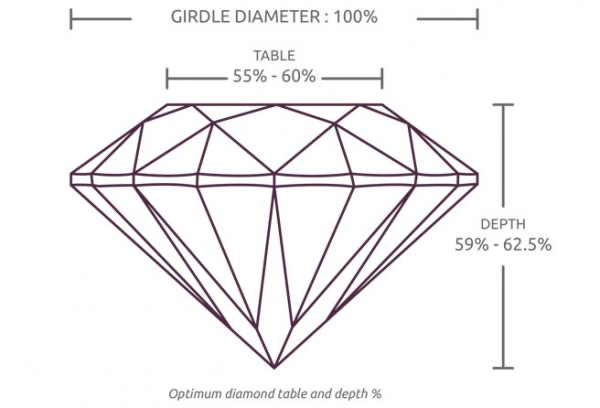

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [112]:
len(df[(df.table >= 55) & (df.table <= 60)]) / len(df)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [113]:
len(df[((df.table >= 55) & (df.table <= 60))&((df.depth >= 59) & (df.depth <= 62.5))])/len(df)

0.6206300529690549

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [114]:
df.price.median()

np.float64(2401.0)

In [115]:
df_op = df[((df.table >= 55) & (df.table <= 60))&((df.depth >= 59) & (df.depth <= 62.5))]
df_op.price.median()

np.float64(2215.0)

In [116]:
print(f'Медианная стоимость всех алмазов больше чему у алмазов с оптимальными значениями глубины и таблицы на {df.price.median()-df_op.price.median()} условных денежных единиц')

Медианная стоимость всех алмазов больше чему у алмазов с оптимальными значениями глубины и таблицы на 186.0 условных денежных единиц


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [117]:
np.corrcoef(df.table, df.price)[0][1]

np.float64(0.12662153885758198)

In [118]:
np.corrcoef(df.depth, df.price)[0][1]

np.float64(-0.010831614226837228)

## Clarity - прозрачность алмаза

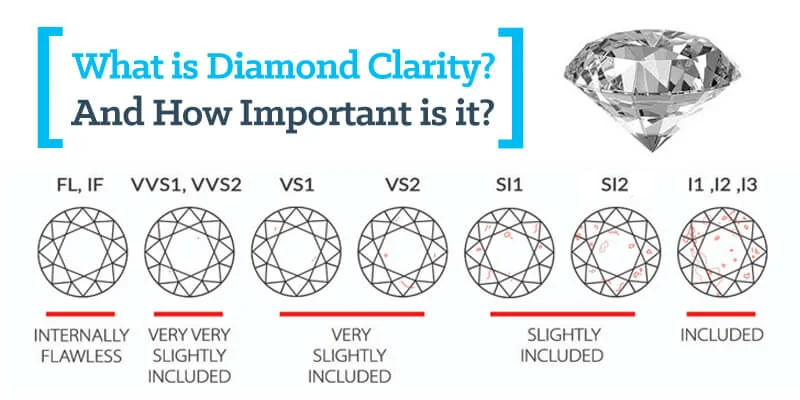

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [119]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [120]:
len(df[(df['clarity'] == 'VVS1') | ((df['clarity'] == 'VVS2'))])

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

<Axes: xlabel='clarity', ylabel='price'>

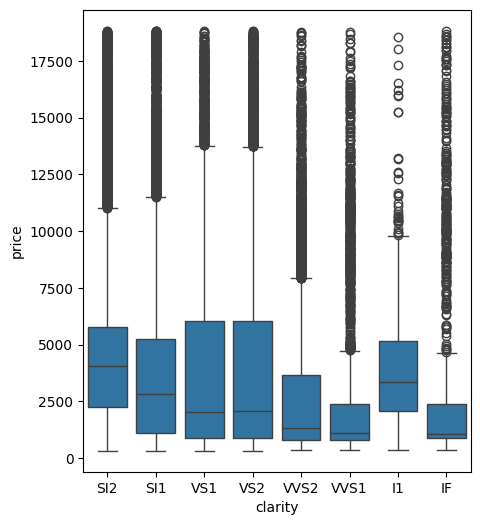

In [121]:
plt.figure(figsize=(5,6))
sns.boxplot(x=df.clarity,y=df.price)

<Axes: xlabel='clarity', ylabel='price'>

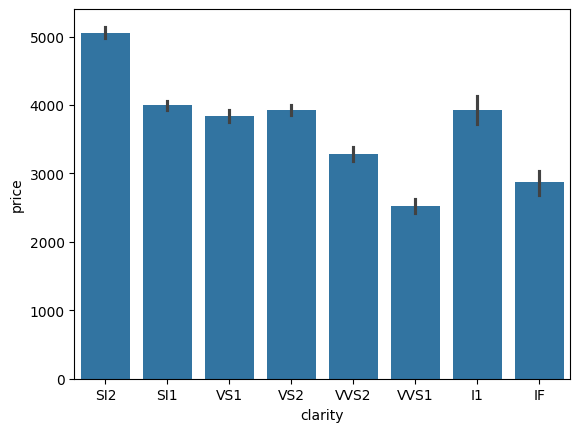

In [122]:
sns.barplot(x=df.clarity, y=df.price, estimator=np.mean)


### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [123]:
result = df.groupby(['cut', 'clarity'])['price'].agg(
    mean_price='mean',
    median_price='median'
).reset_index()

result_sorted = result.sort_values(by='mean_price', ascending=False)

print(result_sorted)

top_row = result_sorted.iloc[0]
print(f"\nНаибольшая средняя стоимость у огранки '{top_row['cut']}' и чистоты '{top_row['clarity']}'")

          cut clarity   mean_price  median_price
27    Premium     SI2  5556.262491        4292.5
3        Fair     SI2  5145.740175        3681.0
35  Very Good     SI2  4988.709447        4042.0
19      Ideal     SI2  4761.711917        4068.0
11       Good     SI2  4544.119816        3763.0
29    Premium     VS2  4539.441053        2724.0
28    Premium     VS1  4491.247730        2362.0
26    Premium     SI1  4451.865244        3618.0
33  Very Good      IF  4373.299625        1708.0
16      Ideal      I1  4335.726027        3673.5
13       Good     VS2  4280.315631        3220.5
37  Very Good     VS2  4217.842758        2727.0
2        Fair     SI1  4201.818182        3511.0
5        Fair     VS2  4189.217054        3202.5
4        Fair     VS1  4165.141176        2829.5
9        Good      IF  4141.931507        1806.0
32  Very Good      I1  4078.226190        3283.0
24    Premium      I1  3947.331707        3261.0
34  Very Good     SI1  3936.972136        2810.0
6        Fair    VVS

## Pandas profiling

In [ ]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     / 17.9 MB 33.2 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00


In [50]:
from ydata_profiling import ProfileReport

In [51]:
df_copy = pd.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [52]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 131.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
profile_report.to_file('Diamonds_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Домашнее задание

## 1) x, y, z

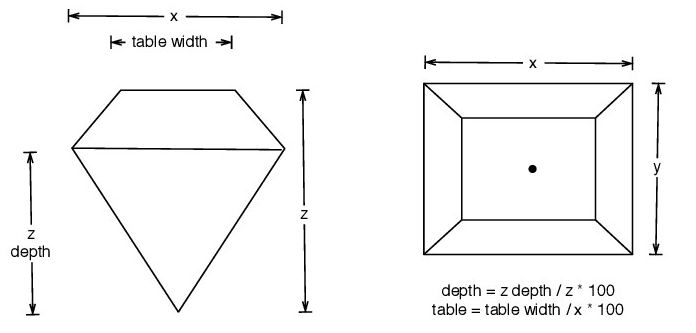

In [124]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

Переименуем колонки

In [125]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [126]:
max([df.x.median(),df.y.median(),df.z.median()])

np.float64(5.71)

Для каждого из этих столбцов вычислите минимальное значение.

In [127]:
list_null = [np.min(df['x']), np.min(df['y']), np.min(df['z'])]
list_null

[np.float64(0.0), np.float64(0.0), np.float64(0.0)]

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [128]:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

carat        cut color clarity  depth  table    price     x     y    z
2201    1.00    Premium     G     SI2   59.1   59.0   3142.0  6.55  6.48  0.0
2308    1.01    Premium     H      I1   58.1   59.0   3167.0  6.66  6.60  0.0
4779    1.10    Premium     G     SI2   63.0   59.0   3696.0  6.50  6.47  0.0
5458    1.01    Premium     F     SI2   59.2   58.0   3837.0  6.50  6.47  0.0
10146   1.50       Good     G      I1   64.0   61.0   4731.0  7.15  7.04  0.0
11158   1.07      Ideal     F     SI2   61.6   56.0   4954.0  0.00  6.62  0.0
11937   1.00  Very Good     H     VS2   63.3   53.0   5139.0  0.00  0.00  0.0
13572   1.15      Ideal     G     VS2   59.2   56.0   5564.0  6.88  6.83  0.0
15916   1.14       Fair     G     VS1   57.5   67.0   6381.0  0.00  0.00  0.0
24342   2.18    Premium     H     SI2   59.4   61.0  12631.0  8.49  8.45  0.0
24468   1.56      Ideal     G     VS2   62.2   54.0  12800.0  0.00  0.00  0.0
26067   2.25    Premium     I     SI1   61.3   58.0  15397.0  8.52  8.42  0.0
26187   1.20    Premium     D    VVS1   62.1   59.0  15686.0  0.00  0.00  0.0
27052   2.20    Premium     H     SI1   61.2   59.0  17265.0  8.42  8.37  0.0
27369   2.25    Premium     H     SI2   62.8   59.0  18034.0  0.00  0.00  0.0
27443   2.02    Premium     H     VS2   62.7   53.0  18207.0  8.02  7.95  0.0
27678   2.80       Good     G     SI2   63.8   58.0  18788.0  8.90  8.85  0.0
49424   0.71       Good     F     SI2   64.1   60.0   2130.0  0.00  0.00  0.0
51372   1.12    Premium     G      I1   60.4   59.0   2383.0  6.71  6.67  0.0

In [129]:
len(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])

19

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [130]:
df_copy = df[df['z'] != 0]
print(df.shape,'\n',df_copy.shape)

(53805, 10) 
 (53786, 10)


In [131]:
df_copy

carat        cut color clarity  depth  table   price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53800   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53801   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53802   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53803   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53804   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

[53786 rows x 10 columns]

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

              x         y         z     price
x      1.000000  0.974774  0.975395  0.887183
y      0.974774  1.000000  0.956581  0.867665
z      0.975395  0.956581  1.000000  0.868089
price  0.887183  0.867665  0.868089  1.000000


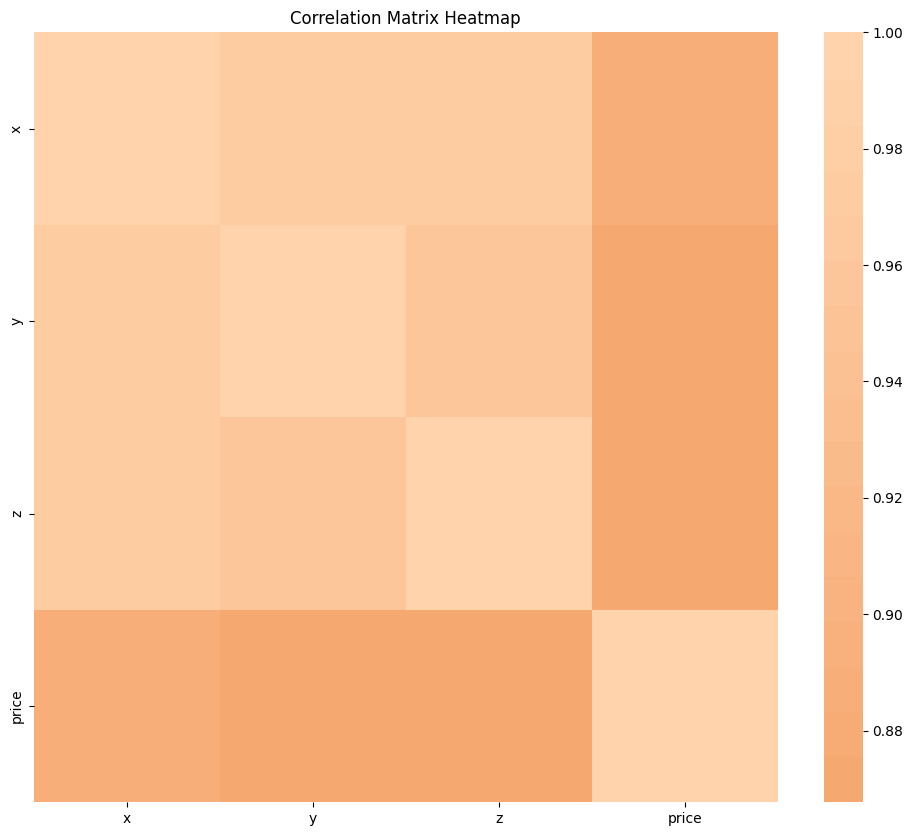

In [132]:
corr = df_copy[['x','y','z','price']].corr(numeric_only=True)
print(corr)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

Больше всех из признаков [x,y,z] с price коррелирует x

### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

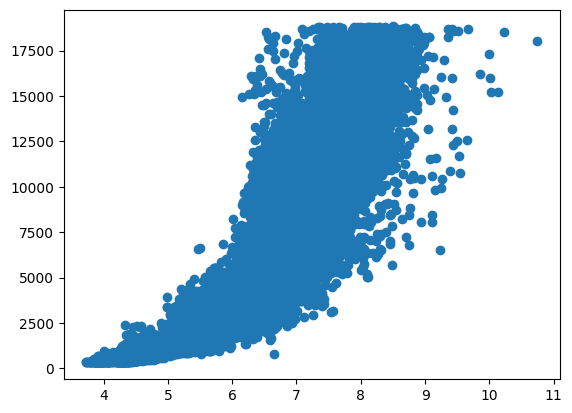

In [133]:
plt.scatter(df_copy['x'], df_copy['price'])

Зависимость координаты x от price похож на полиномиальную зависимость или экспоненту

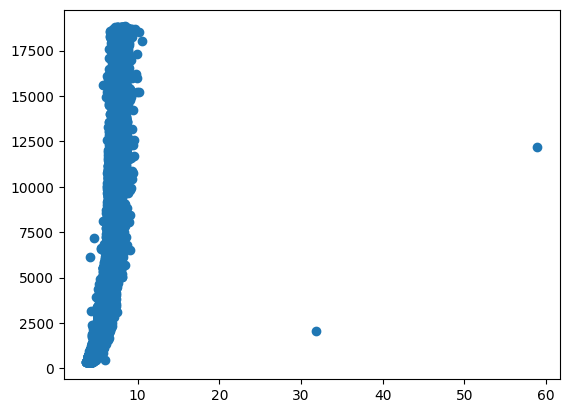

In [134]:
plt.scatter(df_copy['y'], df_copy['price'])

y от price в начале напоминает полином, но затем прямую линию

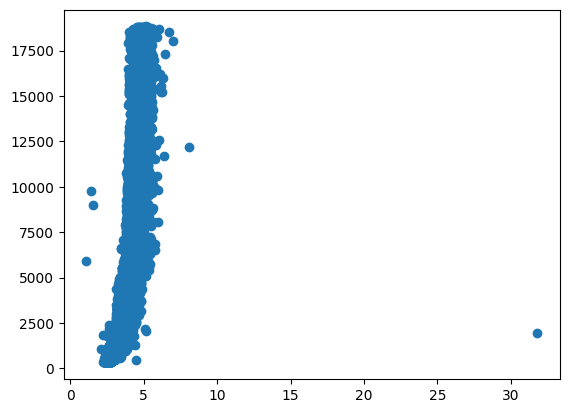

In [135]:
plt.scatter(df_copy['z'], df_copy['price'])

z от price в начале напоминает полином, но затем прямую линию

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [139]:
print(round(len(df[(df.x > df.x.mean()) & (df.y > df.y.mean())])/len(df)*100), '%')

47 %


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [140]:
# ваш код здесь
print(round(len(df[df.carat >= 1][df[df.carat >= 1].z < df.z.median()])/len(df[df.carat >= 1]), 4))

0.0012


## 2) Color

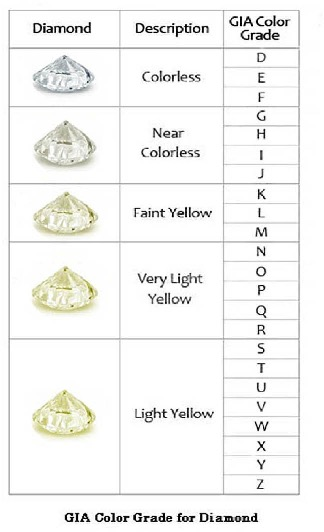

In [141]:
df_copy['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [142]:
near_colorless = []
colorless = []
for i in df_copy['color'].unique():
    if i in ['I', 'J','G','H']: 
        near_colorless.append(i)
    else:
        colorless.append(i)

print('near_colorless:', near_colorless)
print('colorless:', colorless)

near_colorless: ['I', 'J', 'H', 'G']
colorless: ['E', 'F', 'D']


In [87]:
df_copy['near_colorless'] = np.where(df_copy['color'].isin(near_colorless), 1, 0)
df_copy['colorless'] = np.where(df_copy['color'].isin(colorless), 1, 0)
df_copy

/tmp/ipykernel_39131/4263163587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['near_colorless'] = np.where(df_copy['color'].isin(near_colorless), 1, 0)
/tmp/ipykernel_39131/4263163587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['colorless'] = np.where(df_copy['color'].isin(colorless), 1, 0)


carat        cut color clarity  depth  table   price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0   327.0  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0   335.0  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...   
53800   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50   
53801   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61   
53802   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56   
53803   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74   
53804   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64   

       near_colorless  colorless  
0                   0          1  
1                   0          1  
2                   0          1  
3                   1          0  
4                   1          0  
...               ...        ...  
53800               0          1  
53801               0          1  
53802               0          1  
53803               1          0  
53804               0          1  

[53786 rows x 12 columns]

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

/tmp/ipykernel_10258/582727225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color', y='price', data = df, palette='winter')


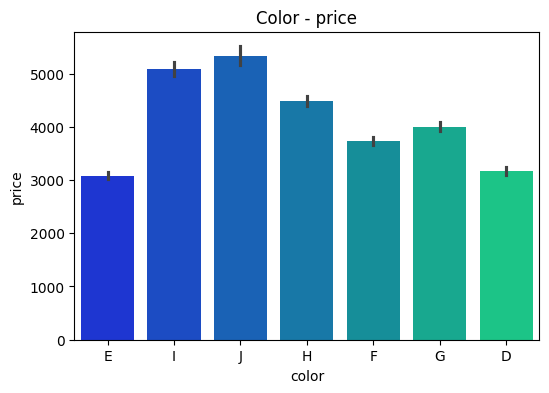

In [143]:
# ваш код здесь
plt.figure(figsize=(6,4))

sns.barplot(x='color', y='price', data = df, palette='winter')
plt.title('Color - price')
plt.show();

Алмазы цвета J дороже остальных

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

       PriceMedian  CaratMedian
color                          
J           4234.5         1.11
I           3721.5         1.00
H           3449.5         0.90
F           2345.0         0.70
G           2242.0         0.70
D           1842.0         0.54
E           1741.0         0.54
CaratMedian убывает? True


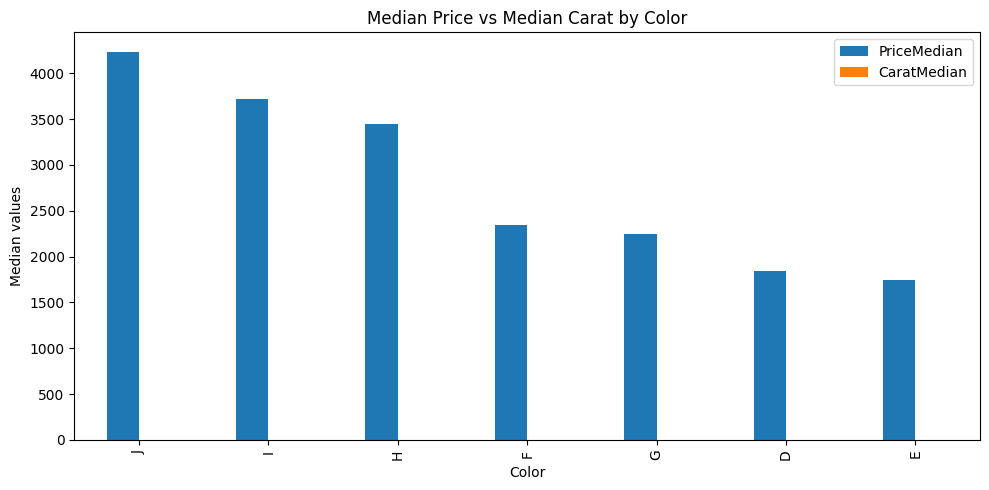

In [144]:
grouped = (
    df_copy
    .groupby('color')
    .agg(
        PriceMedian=('price', 'median'),
        CaratMedian=('carat', 'median')
    )
    .sort_values('PriceMedian', ascending=False)
)

print(grouped)

is_monotonic = grouped['CaratMedian'].is_monotonic_decreasing
print("CaratMedian убывает?", is_monotonic)

grouped[['PriceMedian', 'CaratMedian']].plot(kind='bar', figsize=(10,5))
plt.title("Median Price vs Median Carat by Color")
plt.xlabel("Color")
plt.ylabel("Median values")
plt.tight_layout()
plt.show()


### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [145]:
# ваш код здесь
res = df.groupby(['cut', 'color', 'clarity']).agg(
    AvgPrice=('price', 'mean')
  ).sort_values('AvgPrice', ascending=False)

maxCostly = res.index[0]
maxCostly

('Very Good', 'D', 'IF')

In [99]:
for idx in most_expensive.index:
    print(f"({','.join(idx)})")

(Very Good,D,IF)


# Практическое задание

In [146]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [147]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [170]:
df_encoded = df.copy()

In [168]:
df

carat        cut color clarity  depth  table   price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53800   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53801   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53802   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53803   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53804   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

[53805 rows x 10 columns]

Для cut - label encoding, потому что важно сохранять иерархию (ideal лучше good и т.д)

Для clarity тоже label encoding, важен порядок 

In [171]:
cut_order = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
clarity_map = {'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 1, 'IF': 0}

df_encoded['cut_encoded'] = df_encoded['cut'].map(cut_order)
df_encoded['clarity_encoded'] = df_encoded['clarity'].map(clarity_map)

цвет - one hot encoding, но добавим каждый цвет как столбец

In [172]:
from sklearn.preprocessing import OneHotEncoder

color_col = df[['color']]

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(color_col)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(['color']),
    index=df.index
)

df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop(['cut', 'clarity', 'color'], axis=1)


In [173]:
df_encoded

carat  depth  table   price     x     y     z  cut_encoded  \
0       0.23   61.5   55.0   326.0  3.95  3.98  2.43            4   
1       0.21   59.8   61.0   326.0  3.89  3.84  2.31            3   
2       0.23   56.9   65.0   327.0  4.05  4.07  2.31            1   
3       0.29   62.4   58.0   334.0  4.20  4.23  2.63            3   
4       0.31   63.3   58.0   335.0  4.34  4.35  2.75            1   
...      ...    ...    ...     ...   ...   ...   ...          ...   
53800   0.72   60.8   57.0  2757.0  5.75  5.76  3.50            4   
53801   0.72   63.1   55.0  2757.0  5.69  5.75  3.61            1   
53802   0.70   62.8   60.0  2757.0  5.66  5.68  3.56            2   
53803   0.86   61.0   58.0  2757.0  6.15  6.12  3.74            3   
53804   0.75   62.2   55.0  2757.0  5.83  5.87  3.64            4   

       clarity_encoded  color_D  color_E  color_F  color_G  color_H  color_I  \
0                    6      0.0      1.0      0.0      0.0      0.0      0.0   
1                    5      0.0      1.0      0.0      0.0      0.0      0.0   
2                    3      0.0      1.0      0.0      0.0      0.0      0.0   
3                    4      0.0      0.0      0.0      0.0      0.0      1.0   
4                    6      0.0      0.0      0.0      0.0      0.0      0.0   
...                ...      ...      ...      ...      ...      ...      ...   
53800                5      1.0      0.0      0.0      0.0      0.0      0.0   
53801                5      1.0      0.0      0.0      0.0      0.0      0.0   
53802                5      1.0      0.0      0.0      0.0      0.0      0.0   
53803                6      0.0      0.0      0.0      0.0      1.0      0.0   
53804                6      1.0      0.0      0.0      0.0      0.0      0.0   

       color_J  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          1.0  
...        ...  
53800      0.0  
53801      0.0  
53802      0.0  
53803      0.0  
53804      0.0  

[53805 rows x 16 columns]

In [174]:
corr_matrix = df_encoded.corr()
corr_matrix 

carat     depth     table     price         x         y  \
carat            1.000000  0.028355  0.179995  0.916499  0.970240  0.946804   
depth            0.028355  1.000000 -0.294340 -0.010832 -0.024473 -0.026859   
table            0.179995 -0.294340  1.000000  0.126622  0.194871  0.183160   
price            0.916499 -0.010832  0.126622  1.000000  0.884551  0.865376   
x                0.970240 -0.024473  0.194871  0.884551  1.000000  0.974545   
y                0.946804 -0.026859  0.183160  0.865376  0.974545  1.000000   
z                0.948485  0.094559  0.150300  0.861271  0.970702  0.951805   
cut_encoded     -0.132348 -0.215033 -0.432524 -0.052554 -0.124375 -0.120242   
clarity_encoded  0.340796  0.065936  0.156834  0.137863  0.361141  0.347717   
color_D         -0.110938 -0.014799 -0.008532 -0.072147 -0.105761 -0.103677   
color_E         -0.138842 -0.029316  0.007155 -0.100910 -0.134384 -0.130306   
color_F         -0.059327 -0.017499 -0.004833 -0.024073 -0.047811 -0.046483   
color_G         -0.028870  0.003921 -0.038874  0.008787 -0.024451 -0.024359   
color_H          0.101852  0.025532  0.011526  0.058898  0.095721  0.093333   
color_I          0.159065  0.023900  0.017521  0.096430  0.145777  0.142184   
color_J          0.180522  0.022023  0.037362  0.081844  0.165131  0.161235   

                        z  cut_encoded  clarity_encoded   color_D   color_E  \
carat            0.948485    -0.132348         0.340796 -0.110938 -0.138842   
depth            0.094559    -0.215033         0.065936 -0.014799 -0.029316   
table            0.150300    -0.432524         0.156834 -0.008532  0.007155   
price            0.861271    -0.052554         0.137863 -0.072147 -0.100910   
x                0.970702    -0.124375         0.361141 -0.105761 -0.134384   
y                0.951805    -0.120242         0.347717 -0.103677 -0.130306   
z                1.000000    -0.147961         0.356205 -0.104889 -0.132382   
cut_encoded     -0.147961     1.000000        -0.182190  0.007715 -0.003885   
clarity_encoded  0.356205    -0.182190         1.000000  0.076711  0.020139   
color_D         -0.104889     0.007715         0.076711  1.000000 -0.178570   
color_E         -0.132382    -0.003885         0.020139 -0.178570  1.000000   
color_F         -0.048559    -0.007292        -0.022510 -0.175706 -0.218502   
color_G         -0.024409     0.039790        -0.129856 -0.194990 -0.242483   
color_H          0.094795    -0.010611         0.035833 -0.161561 -0.200911   
color_I          0.144586    -0.008691         0.021737 -0.126684 -0.157540   
color_J          0.164679    -0.036105         0.039485 -0.088819 -0.110452   

                  color_F   color_G   color_H   color_I   color_J  
carat           -0.059327 -0.028870  0.101852  0.159065  0.180522  
depth           -0.017499  0.003921  0.025532  0.023900  0.022023  
table           -0.004833 -0.038874  0.011526  0.017521  0.037362  
price           -0.024073  0.008787  0.058898  0.096430  0.081844  
x               -0.047811 -0.024451  0.095721  0.145777  0.165131  
y               -0.046483 -0.024359  0.093333  0.142184  0.161235  
z               -0.048559 -0.024409  0.094795  0.144586  0.164679  
cut_encoded     -0.007292  0.039790 -0.010611 -0.008691 -0.036105  
clarity_encoded -0.022510 -0.129856  0.035833  0.021737  0.039485  
color_D         -0.175706 -0.194990 -0.161561 -0.126684 -0.088819  
color_E         -0.218502 -0.242483 -0.200911 -0.157540 -0.110452  
color_F          1.000000 -0.238594 -0.197690 -0.155014 -0.108681  
color_G         -0.238594  1.000000 -0.219386 -0.172027 -0.120609  
color_H         -0.197690 -0.219386  1.000000 -0.142534 -0.099931  
color_I         -0.155014 -0.172027 -0.142534  1.000000 -0.078359  
color_J         -0.108681 -0.120609 -0.099931 -0.078359  1.000000

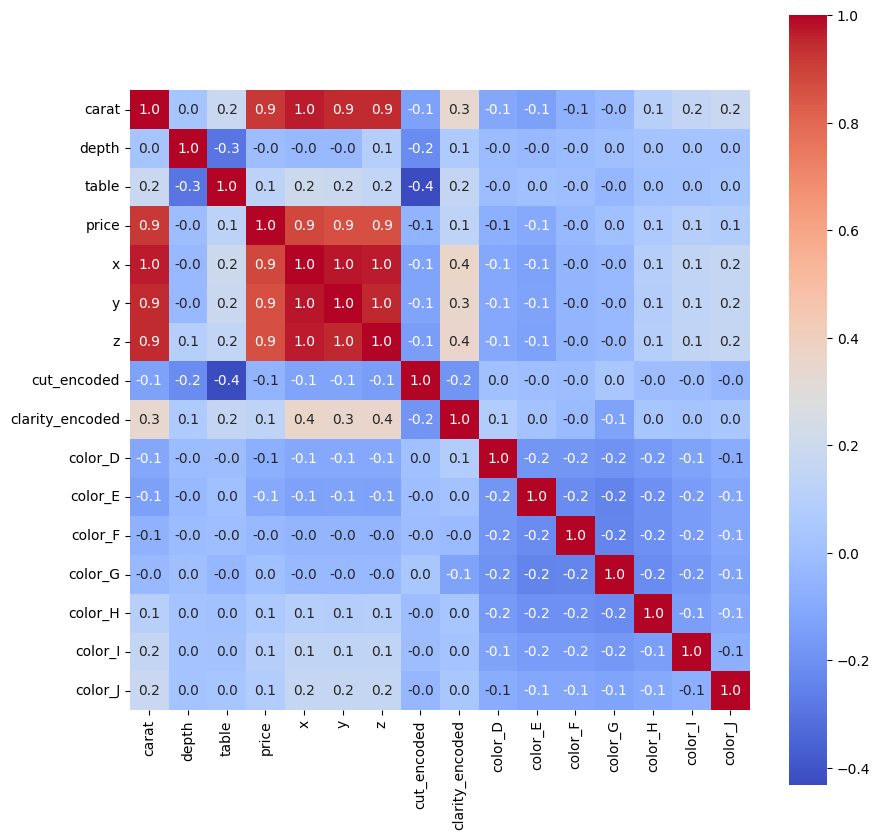

In [175]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    square=True
)
plt.show()

In [176]:
df_encoded

carat  depth  table   price     x     y     z  cut_encoded  \
0       0.23   61.5   55.0   326.0  3.95  3.98  2.43            4   
1       0.21   59.8   61.0   326.0  3.89  3.84  2.31            3   
2       0.23   56.9   65.0   327.0  4.05  4.07  2.31            1   
3       0.29   62.4   58.0   334.0  4.20  4.23  2.63            3   
4       0.31   63.3   58.0   335.0  4.34  4.35  2.75            1   
...      ...    ...    ...     ...   ...   ...   ...          ...   
53800   0.72   60.8   57.0  2757.0  5.75  5.76  3.50            4   
53801   0.72   63.1   55.0  2757.0  5.69  5.75  3.61            1   
53802   0.70   62.8   60.0  2757.0  5.66  5.68  3.56            2   
53803   0.86   61.0   58.0  2757.0  6.15  6.12  3.74            3   
53804   0.75   62.2   55.0  2757.0  5.83  5.87  3.64            4   

       clarity_encoded  color_D  color_E  color_F  color_G  color_H  color_I  \
0                    6      0.0      1.0      0.0      0.0      0.0      0.0   
1                    5      0.0      1.0      0.0      0.0      0.0      0.0   
2                    3      0.0      1.0      0.0      0.0      0.0      0.0   
3                    4      0.0      0.0      0.0      0.0      0.0      1.0   
4                    6      0.0      0.0      0.0      0.0      0.0      0.0   
...                ...      ...      ...      ...      ...      ...      ...   
53800                5      1.0      0.0      0.0      0.0      0.0      0.0   
53801                5      1.0      0.0      0.0      0.0      0.0      0.0   
53802                5      1.0      0.0      0.0      0.0      0.0      0.0   
53803                6      0.0      0.0      0.0      0.0      1.0      0.0   
53804                6      1.0      0.0      0.0      0.0      0.0      0.0   

       color_J  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          1.0  
...        ...  
53800      0.0  
53801      0.0  
53802      0.0  
53803      0.0  
53804      0.0  

[53805 rows x 16 columns]

Посмотрим на матрицу корреляции без x,y,z и целевой переменной - price

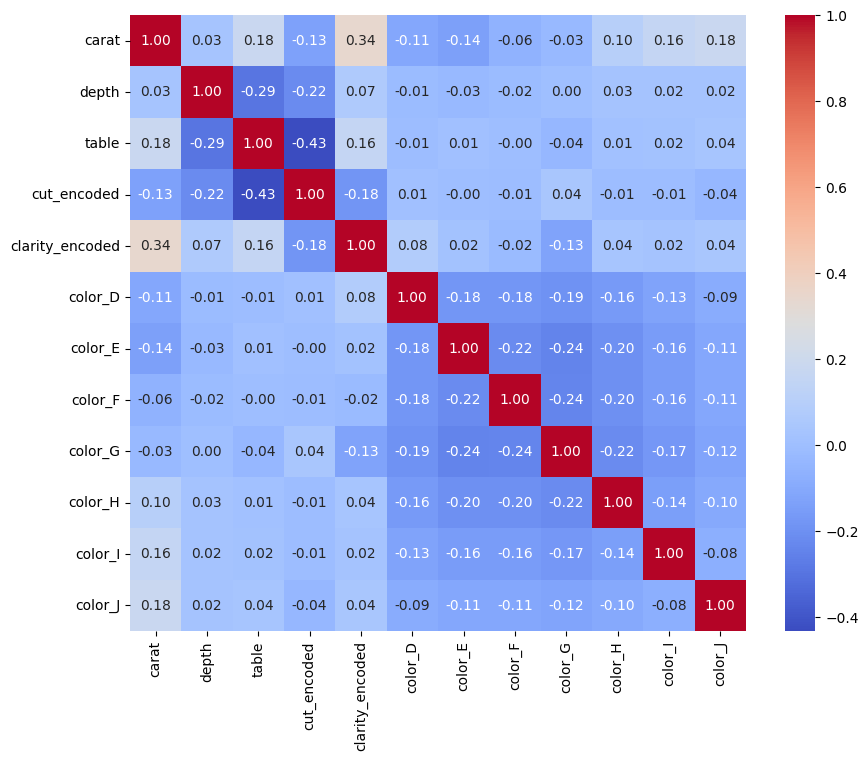

In [177]:
corr_matrix = df_encoded.drop(['price','x','y','z'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
)
plt.show()

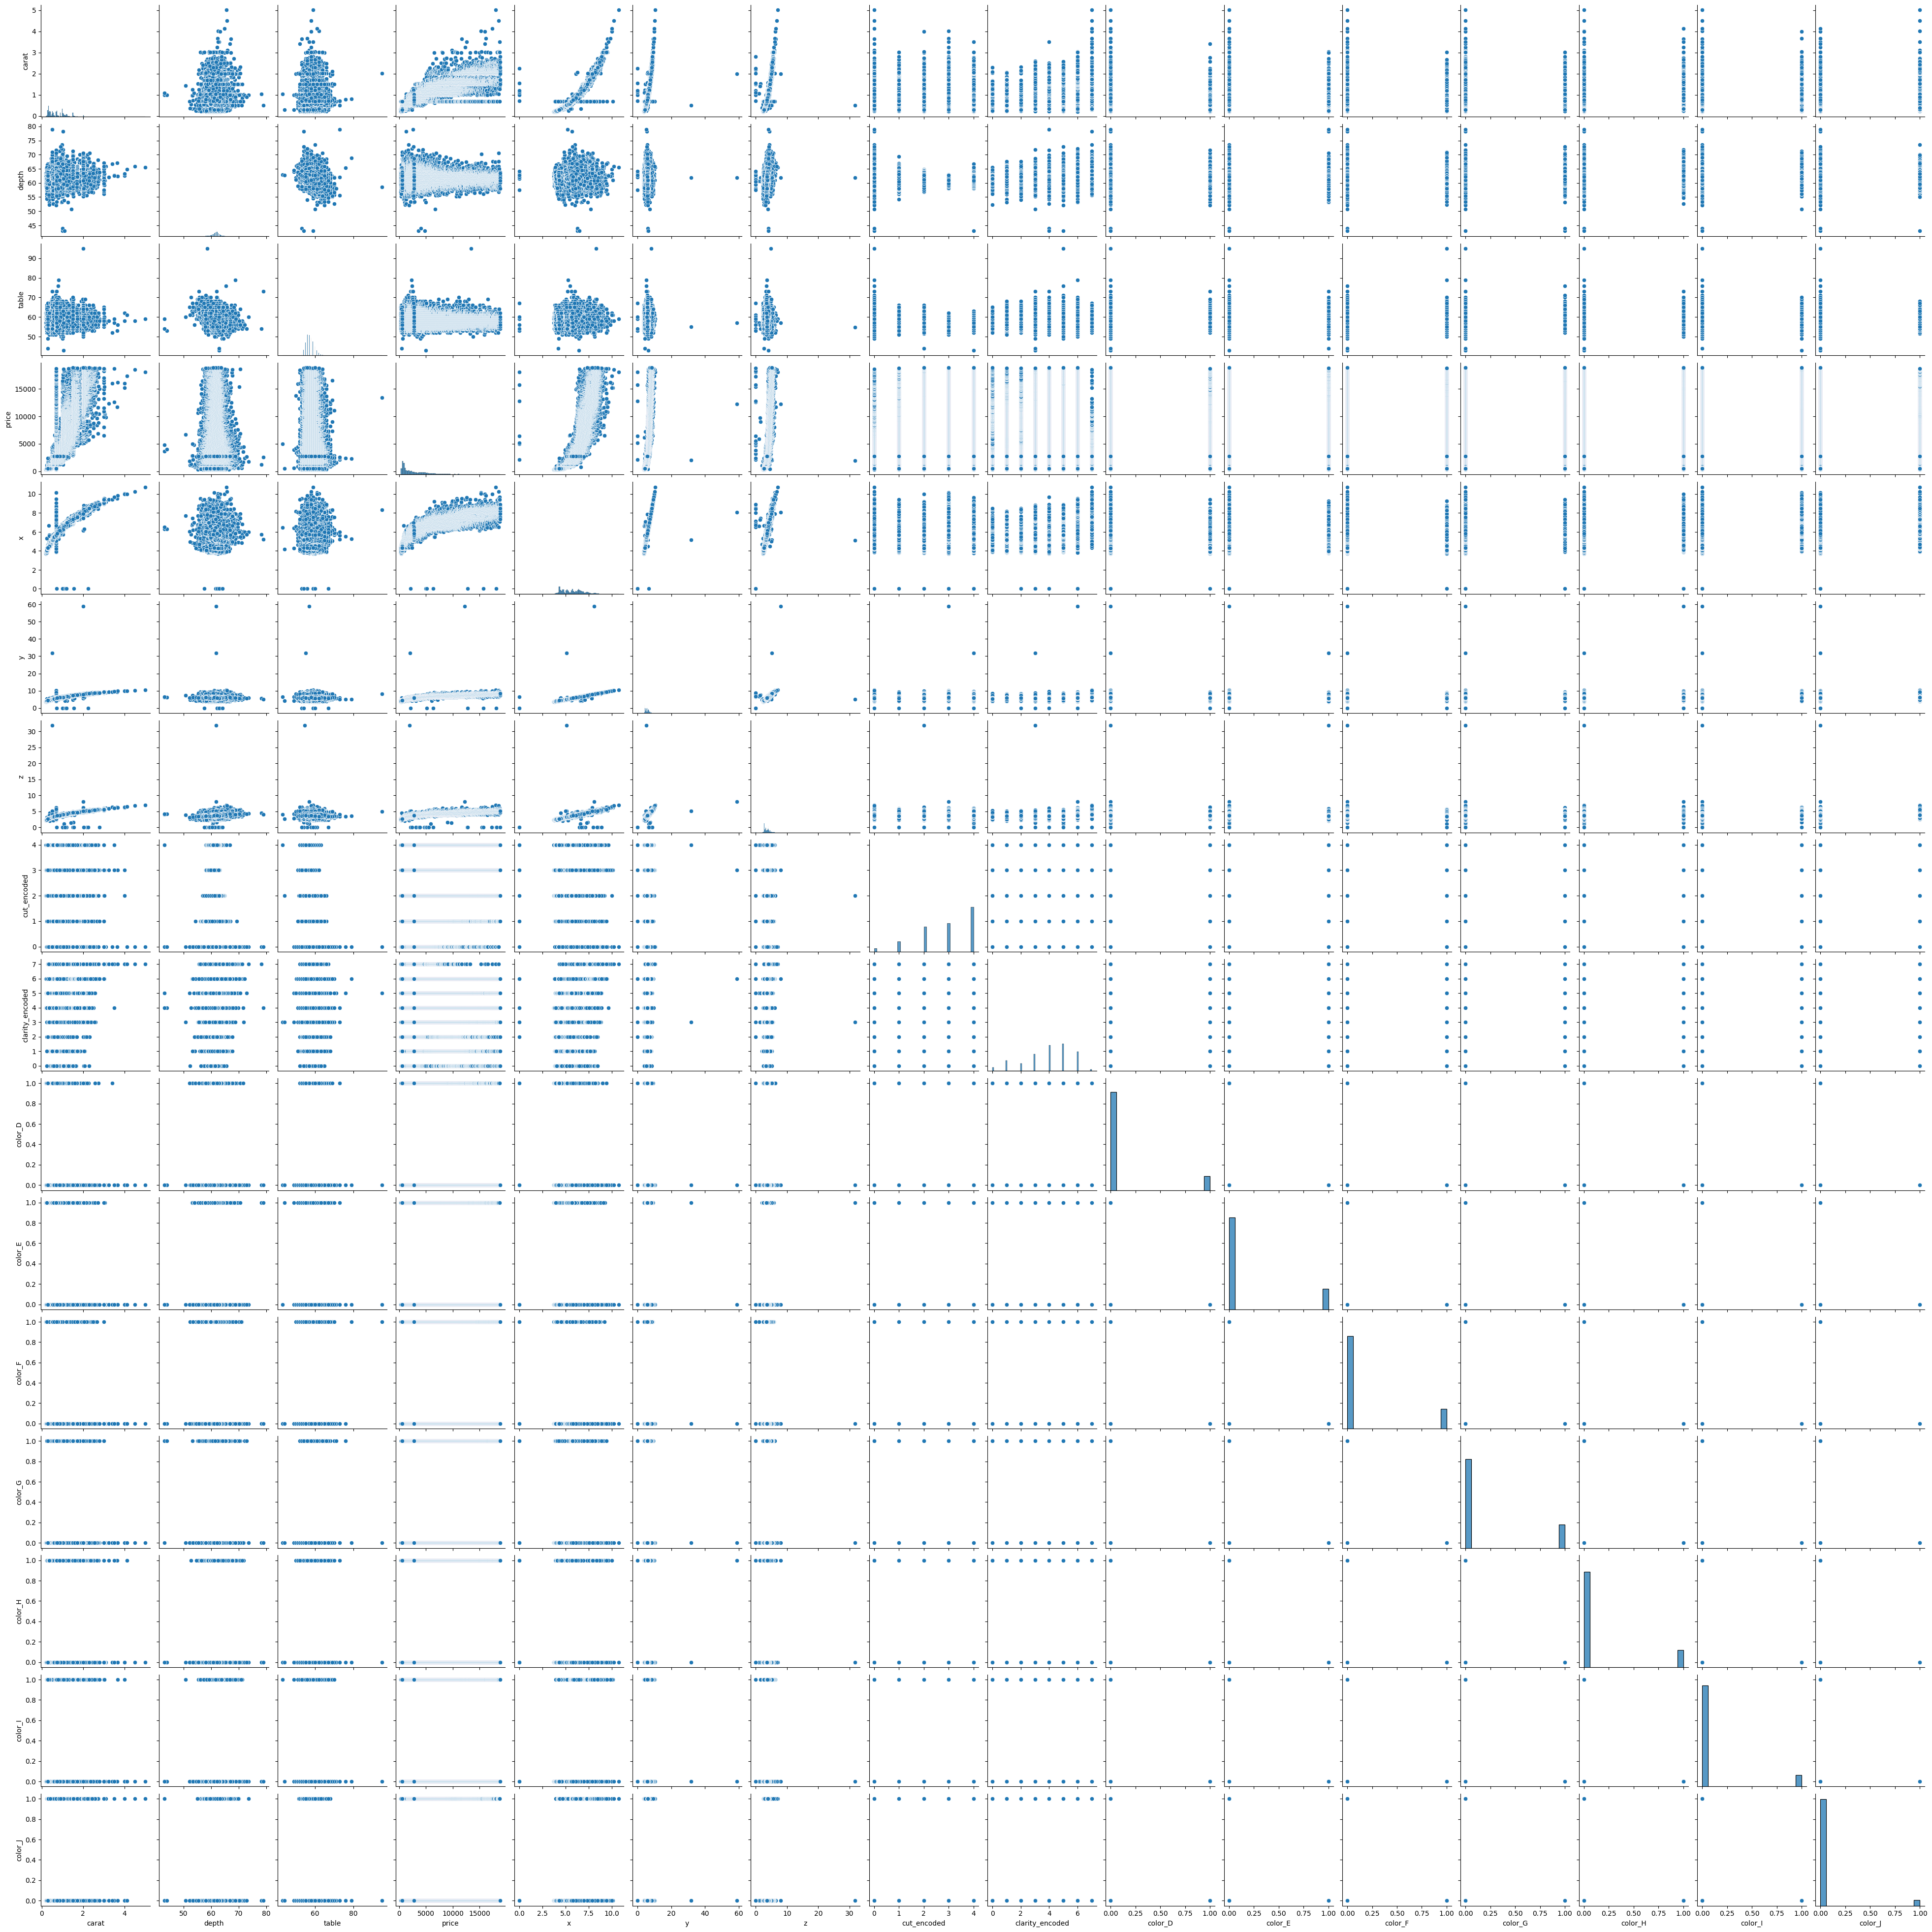

In [178]:
sns.pairplot(df_encoded)

# Зависимость признаков

In [179]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

## RandomForest

In [182]:
from sklearn.ensemble import RandomForestRegressor

rndForest = RandomForestRegressor(n_estimators=100, random_state=43)
rndForest.fit(X, y)

RandomForestRegressor(random_state=43)

### Feature importance 

In [183]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rndForest.feature_importances_
}).sort_values(by='importance', ascending=False)
feature_importances

feature  importance
4                 y    0.864800
7   clarity_encoded    0.062635
0             carat    0.018031
14          color_J    0.010953
3                 x    0.008175
13          color_I    0.007803
5                 z    0.006417
12          color_H    0.005558
1             depth    0.003123
8           color_D    0.002774
11          color_G    0.002434
2             table    0.002302
9           color_E    0.001760
6       cut_encoded    0.001621
10          color_F    0.001613

### permutation importance

In [184]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rndForest, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

y:1.1174 
carat:0.4001 
clarity_encoded:0.1678 
color_J:0.0411 
color_I:0.0328 
z:0.0225 
x:0.0224 
color_H:0.0191 
color_D:0.0130 
color_G:0.0102 
color_E:0.0086 
color_F:0.0079 
depth:0.0037 
cut_encoded:0.0032 
table:0.0031 


## GradientBoostingRegressor

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

gradBoost = GradientBoostingRegressor(random_state=11)
gradBoost.fit(X, y)

GradientBoostingRegressor(random_state=11)

### feature_importances

In [186]:
feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': gradBoost.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

feature  importance
4                 y    0.813731
5                 z    0.075069
7   clarity_encoded    0.058421
0             carat    0.015022
3                 x    0.014400
14          color_J    0.009670
13          color_I    0.005235
8           color_D    0.002551
10          color_F    0.001737
12          color_H    0.001687
9           color_E    0.001082
11          color_G    0.000707
6       cut_encoded    0.000367
1             depth    0.000299
2             table    0.000022

## permutation importance

In [187]:
res = permutation_importance(gradBoost, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

y:0.8983 
carat:0.3334 
clarity_encoded:0.1321 
z:0.0857 
x:0.0308 
color_J:0.0203 
color_I:0.0105 
color_D:0.0062 
color_E:0.0043 
color_H:0.0028 
color_F:0.0025 
cut_encoded:0.0011 
color_G:0.0006 
depth:0.0005 
table:0.0000 


## Linear Regression

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linReg = LinearRegression()
linReg.fit(X_scaled, y)


LinearRegression()

### feature_importances

In [189]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': linReg.coef_
}).sort_values(by='importance', ascending=False)
feature_importances

feature   importance
0             carat  4202.114061
8           color_D   205.848068
9           color_E   157.901800
6       cut_encoded   135.298025
10          color_F   114.247798
4                 y    81.432581
11          color_G    41.133418
5                 z     4.368073
2             table   -49.890199
1             depth   -71.553389
12          color_H  -122.886193
3                 x  -165.580886
13          color_I  -220.214269
14          color_J  -355.020794
7   clarity_encoded  -802.876449

permutation_importance

In [190]:
res = permutation_importance(linReg, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

/home/alexus/Desktop/DeepCA/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/alexus/Desktop/DeepCA/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/alexus/Desktop/DeepCA/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/alexus/Desktop/DeepCA/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/alexus/Desktop/DeepCA/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.w

carat:1.0676 
y:0.0269 
clarity_encoded:0.0057 
z:0.0009 
color_D:0.0002 
depth:0.0001 
color_F:-0.0001 
color_G:-0.0002 
color_J:-0.0006 
color_H:-0.0006 
color_E:-0.0008 
color_I:-0.0011 
cut_encoded:-0.0053 
table:-0.0059 
x:-0.0486 


# Обучение моделей

In [200]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_binned = pd.qcut(y_train, q=5, labels=False)

In [201]:
features_2 = ['y', 'z']
features_4 = ['cut_encoded', 'carat', 'clarity_encoded','color_J']
features_all = ['carat',	'depth',	'table',	'x',	'y',	'z',	'cut_encoded',	'clarity_encoded',	'color_D',	'color_E',	'color_F',	'color_G',	'color_H', 'color_I',	'color_J']

In [202]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_split=5,
        min_samples_leaf=2, random_state=42, n_jobs=-1
    ),
    'GradientBoosting': GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5,
        min_samples_split=5, min_samples_leaf=2, random_state=42
    )
}

In [203]:
def train_and_evaluate_model(model, features):
    X_train_f = X_train[features]
    X_test_f = X_test[features]

    if isinstance(model, LinearRegression):
        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train_f)
        X_test_sc = scaler.transform(X_test_f)
        cv = cross_val_score(model, X_train_sc, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_f, y_train_binned),
                             scoring='r2')
        model.fit(X_train_sc, y_train)
        y_pred_test = model.predict(X_test_sc)
    else:
        cv = cross_val_score(model, X_train_f, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_f, y_train_binned),
                             scoring='r2')
        model.fit(X_train_f, y_train)
        y_pred_test = model.predict(X_test_f)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    return {
        'model': model,
        'cv_mean_r2': cv.mean(),
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae
    }

In [208]:
all_results = {}
for name, feats in [('2 признака', features_2), ('4 признака', features_4), ('все признаки', features_all)]:
    all_results[name] = {}
    for model_name, model in models.items():
        result = train_and_evaluate_model(model, feats)
        all_results[name][model_name] = result

comparison_data = []
for feat_set, models_res in all_results.items():
    for model_name, res in models_res.items():
        comparison_data.append({
            'Набор признаков': feat_set,
            'Модель': model_name,
            'CV R²': f"{res['cv_mean_r2']:.4f}",
            'Test R²': f"{res['test_r2']:.4f}",
            'Test RMSE': f"{res['test_rmse']:.2f}",
            'Test MAE': f"{res['test_mae']:.2f}"
        })

comparison_df = pd.DataFrame(comparison_data)

In [213]:
y_test.mean()

np.float64(3878.9869900566864)

In [209]:
comparison_df

Набор признаков            Модель   CV R² Test R² Test RMSE Test MAE
0      2 признака  LinearRegression  0.7372  0.7745   1856.61  1351.01
1      2 признака      RandomForest  0.8817  0.8746   1384.64   784.00
2      2 признака  GradientBoosting  0.8818  0.8770   1371.09   780.34
3      4 признака  LinearRegression  0.8842  0.8833   1335.51   886.20
4      4 признака      RandomForest  0.9425  0.9443    922.74   481.19
5      4 признака  GradientBoosting  0.9429  0.9446    920.57   478.46
6    все признаки  LinearRegression  0.8933  0.8937   1274.89   853.44
7    все признаки      RandomForest  0.9762  0.9759    606.97   322.55
8    все признаки  GradientBoosting  0.9801  0.9791    565.85   294.38

In [218]:
print(f'Все признаки: LinearRegression отклонение предсказания на {(1274.89/y_test.mean()*100):.2f}%')
print(f'Все признаки: RandomForest отклонение предсказания на {(606.97/y_test.mean()*100):.2f}%')
print(f'Все признаки: GradientBoosting отклонение предсказания на {(565.85/y_test.mean()*100):.2f}%')

Все признаки: LinearRegression отклонение предсказания на 32.87%
Все признаки: RandomForest отклонение предсказания на 15.65%
Все признаки: GradientBoosting отклонение предсказания на 14.59%
